In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv('neuralnetwork.csv')
print(data)

        StationId          Datetime  PM2.5    PM10    NH3    NO2      O3  \
0           AP001  24-11-2017 17:00  60.50   98.00   8.50  30.80  126.40   
1           AP001  24-11-2017 18:00  65.50  111.25   9.77  24.20  117.12   
2           AP001  24-11-2017 19:00  80.00  132.00  12.02  25.18   98.98   
3           AP001  24-11-2017 20:00  81.50  133.25  11.58  16.25  112.20   
4           AP001  24-11-2017 21:00  75.25  116.00  12.03  17.48  106.35   
...           ...               ...    ...     ...    ...    ...     ...   
1048570     DL032  08-05-2018 13:00  36.00  106.00   1.08    NaN     NaN   
1048571     DL032  08-05-2018 14:00  31.00  114.00   1.00    NaN     NaN   
1048572     DL032  08-05-2018 15:00  35.00  112.00   0.85    NaN     NaN   
1048573     DL032  08-05-2018 16:00  44.00  108.00   1.58    NaN  120.53   
1048574     DL032  08-05-2018 17:00  52.00  111.00   8.91  11.40  102.49   

           SO2  Unnamed: 8  Unnamed: 9  AQI  AQI_Bucket  
0        11.85         NaN   

In [ ]:
data.isnull().sum()

StationId           0
Datetime            0
PM2.5          248389
PM10           342735
NH3            466777
NO2            217132
O3             250488
SO2            384227
Unnamed: 8    1048575
Unnamed: 9    1048575
AQI           1048575
AQI_Bucket    1048575
dtype: int64

In [ ]:
data.head()

,StationId,Datetime,PM2.5,PM10,NH3,NO2,O3,SO2,Unnamed: 8,Unnamed: 9,AQI,AQI_Bucket
0,AP001,24-11-2017 17:00,60.50,98.00,8.50,30.80,126.40,11.85,NaN,NaN,NaN,NaN
1,AP001,24-11-2017 18:00,65.50,111.25,9.77,24.20,117.12,13.17,NaN,NaN,NaN,NaN
2,AP001,24-11-2017 19:00,80.00,132.00,12.02,25.18,98.98,12.08,NaN,NaN,NaN,NaN
3,AP001,24-11-2017 20:00,81.50,133.25,11.58,16.25,112.20,10.47,NaN,NaN,NaN,NaN
4,AP001,24-11-2017 21:00,75.25,116.00,12.03,17.48,106.35,9.12,NaN,NaN,NaN,NaN


In [ ]:
data = data.drop(['Unnamed: 8','Unnamed: 9'],axis=1)

In [ ]:
data = data.drop(['AQI','AQI_Bucket'],axis=1)

In [ ]:
data.head()

,StationId,Datetime,PM2.5,PM10,NH3,NO2,O3,SO2
0,AP001,24-11-2017 17:00,60.50,98.00,8.50,30.80,126.40,11.85
1,AP001,24-11-2017 18:00,65.50,111.25,9.77,24.20,117.12,13.17
2,AP001,24-11-2017 19:00,80.00,132.00,12.02,25.18,98.98,12.08
3,AP001,24-11-2017 20:00,81.50,133.25,11.58,16.25,112.20,10.47
4,AP001,24-11-2017 21:00,75.25,116.00,12.03,17.48,106.35,9.12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   StationId  1048575 non-null  object 
 1   Datetime   1048575 non-null  object 
 2   PM2.5      800186 non-null   float64
 3   PM10       705840 non-null   float64
 4   NH3        581798 non-null   float64
 5   NO2        831443 non-null   float64
 6   O3         798087 non-null   float64
 7   SO2        664348 non-null   float64
dtypes: float64(6), object(2)
memory usage: 64.0+ MB


In [ ]:
data.isna().sum()

StationId         0
Datetime          0
PM2.5        248389
PM10         342735
NH3          466777
NO2          217132
O3           250488
SO2          384227
dtype: int64

In [ ]:
data['SO2']=data['SO2'].fillna(data['SO2'].mean())
data['NO2']=data['NO2'].fillna(data['NO2'].mean())
data['PM2.5']=data['PM2.5'].fillna(data['PM2.5'].mean())
data['PM10']=data['PM10'].fillna(data['PM10'].mean())
data['NH3']=data['NH3'].fillna(data['NH3'].mean())
data['O3']=data['O3'].fillna(data['O3'].mean())

In [ ]:
data.isna().sum()

StationId    0
Datetime     0
PM2.5        0
PM10         0
NH3          0
NO2          0
O3           0
SO2          0
dtype: int64

In [ ]:
data.head(100)

,StationId,Datetime,PM2.5,PM10,NH3,NO2,O3,SO2
0,AP001,24-11-2017 17:00,60.50,98.00,8.50,30.80,126.40,11.85
1,AP001,24-11-2017 18:00,65.50,111.25,9.77,24.20,117.12,13.17
2,AP001,24-11-2017 19:00,80.00,132.00,12.02,25.18,98.98,12.08
3,AP001,24-11-2017 20:00,81.50,133.25,11.58,16.25,112.20,10.47
4,AP001,24-11-2017 21:00,75.25,116.00,12.03,17.48,106.35,9.12
...,...,...,...,...,...,...,...,...
95,AP001,28-11-2017 16:00,58.25,91.00,10.55,23.45,194.02,30.70
96,AP001,28-11-2017 17:00,58.50,97.00,11.17,24.10,182.78,29.25
97,AP001,28-11-2017 18:00,58.75,102.00,8.78,35.40,108.27,17.17
98,AP001,28-11-2017 19:00,64.00,117.00,8.60,29.37,98.98,12.00


In [ ]:
def calculate_si(SO2):
    si=0
    if (SO2<=40):
     si= SO2*(50/40)
    if (SO2>40 and SO2<=80):
     si= 50+(SO2-40)*(50/40)
    if (SO2>80 and SO2<=380):
     si= 100+(SO2-80)*(100/300)
    if (SO2>380 and SO2<=800):
     si= 200+(SO2-380)*(100/800)
    if (SO2>800 and SO2<=1600):
     si= 300+(SO2-800)*(100/800)
    if (SO2>1600):
     si= 400+(SO2-1600)*(100/800)
    return si
data['si']=data['SO2'].apply(calculate_si)
df= data[['SO2','si']]
df.head()

,SO2,si
0,11.85,14.8125
1,13.17,16.4625
2,12.08,15.1000
3,10.47,13.0875
4,9.12,11.4000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   StationId  1048575 non-null  object 
 1   Datetime   1048575 non-null  object 
 2   PM2.5      1048575 non-null  float64
 3   PM10       1048575 non-null  float64
 4   NH3        1048575 non-null  float64
 5   NO2        1048575 non-null  float64
 6   O3         1048575 non-null  float64
 7   SO2        1048575 non-null  float64
 8   si         1048575 non-null  float64
dtypes: float64(7), object(2)
memory usage: 72.0+ MB


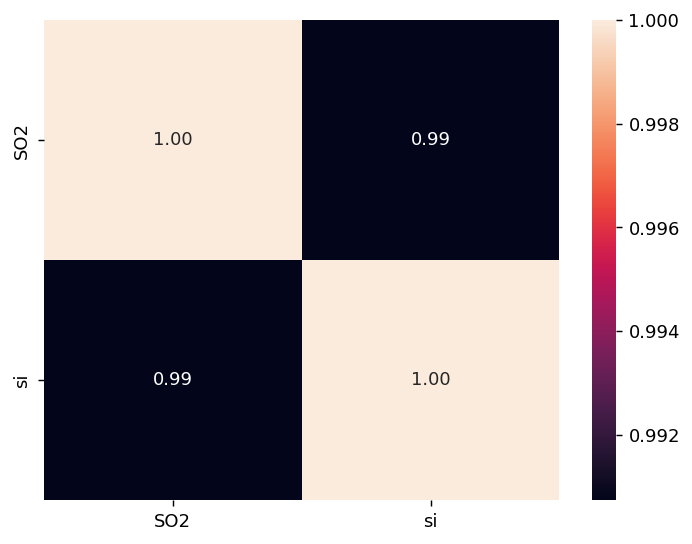

In [ ]:
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [ ]:
def calculate_ni(NO2):
    ni=0
    if(NO2<=40):
     ni= NO2*50/40
    elif(NO2>40 and NO2<=80):
     ni= 50+(NO2-14)*(50/40)
    elif(NO2>80 and NO2<=180):
     ni= 100+(NO2-80)*(100/100)
    elif(NO2>180 and NO2<=280):
     ni= 200+(NO2-180)*(100/100)
    elif(NO2>280 and NO2<=400):
     ni= 300+(NO2-280)*(100/120)
    else:
     ni= 400+(NO2-400)*(100/120)
    return ni
data['ni']=data['NO2'].apply(calculate_ni)
df= data[['NO2','ni']]
df.head()

,NO2,ni
0,30.80,38.5000
1,24.20,30.2500
2,25.18,31.4750
3,16.25,20.3125
4,17.48,21.8500


In [ ]:
def calculate_Ni(NH3):
    Ni=0
    if(NH3<=50):
     Ni=NH3*50/200
    elif(NH3>200 and NH3<=400):
     Ni=50+(NH3-200)*50/200
    elif(NH3>400 and NH3<800):
     Ni=100+(NH3-400)*100/400
    elif(NH3>800 and NH3<=1200):
     Ni=200+(NH3-800)*100/400
    elif(NH3>1200 and NH3<=1800):
     Ni=300+(NH3-120)*(100/600)
    else:
     Ni=400+(NH3-1800)*(100/600)
    return Ni
data['Ni']=data['NH3'].apply(calculate_Ni)
df= data[['NH3','Ni']]
df.tail()

,NH3,Ni
1048570,1.08,0.2700
1048571,1.00,0.2500
1048572,0.85,0.2125
1048573,1.58,0.3950
1048574,8.91,2.2275


In [ ]:
def calculate_spm(rpi):
    rpi=0
    if(rpi<=50):
     rpi=rpi*50/50
    elif(rpi>50 and rpi<=100):
     rpi=50+(rpi-40)*50/50
    elif(rpi>100 and rpi<250):
     rpi=100+(rpi-100)*100/150
    elif(rpi>250 and rpi<=350):
     rpi=200+(rpi-250)*100/100
    elif(rpi>350 and rpi<=430):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=300+(rpi-250)*(100/80)
    return rpi
data['rpi']=data['PM10'].apply(calculate_si)
df= data[['PM10','rpi']]
df.tail()

,PM10,rpi
1048570,106.0,108.666667
1048571,114.0,111.333333
1048572,112.0,110.666667
1048573,108.0,109.333333
1048574,111.0,110.333333


In [ ]:
def calculate_O(O3):
    O=0
    if(O3<=50):
     O=O3*(50/50)
    if(O3>50 and O3<=100):
     O=50+(O3-50)*(50/50)
    elif(O3>100 and O3<170):
     O= 100+(O3-100)*(100/70)
    elif(O3>170 and O3<210):
     O=200+(O3-170)*(100/40)
    elif(O3>210 and O3<=750):
     O=300+(O3-210)*(100/540)
    else:
     O=400+(O3-750)*(100/540)
    return O
data['O']=data['O3'].apply(calculate_O)
df= data[['O3','O']]
df.tail()

,O3,O
1048570,43.310098,269.131500
1048571,43.310098,269.131500
1048572,43.310098,269.131500
1048573,120.530000,129.328571
1048574,102.490000,103.557143


In [ ]:
data.head()

,StationId,Datetime,PM2.5,PM10,NH3,NO2,O3,SO2,si,ni,Ni,rpi,O
0,AP001,24-11-2017 17:00,60.50,98.00,8.50,30.80,126.40,11.85,14.8125,38.5000,2.1250,106.000000,137.714286
1,AP001,24-11-2017 18:00,65.50,111.25,9.77,24.20,117.12,13.17,16.4625,30.2500,2.4425,110.416667,124.457143
2,AP001,24-11-2017 19:00,80.00,132.00,12.02,25.18,98.98,12.08,15.1000,31.4750,3.0050,117.333333,98.980000
3,AP001,24-11-2017 20:00,81.50,133.25,11.58,16.25,112.20,10.47,13.0875,20.3125,2.8950,117.750000,117.428571
4,AP001,24-11-2017 21:00,75.25,116.00,12.03,17.48,106.35,9.12,11.4000,21.8500,3.0075,112.000000,109.071429


In [ ]:
def calculate_spi(spm):
    spi=0
    if(spm<=30):
     spi=spm*(50/30)
    if(spm>30 and spm<=60):
     spi=50+(spm-30)*(50/30)
    elif(spm>60 and spm<90):
     spi= 100+(spm-60)*(100/30)
    elif(spm>90 and spm<120):
     spi=200+(spm-90)*(100/30)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['PM10'].apply(calculate_spi)
df= data[['PM10','spi']]
df.tail()

,PM10,spi
1048570,106.0,253.333333
1048571,114.0,280.000000
1048572,112.0,273.333333
1048573,108.0,260.000000
1048574,111.0,270.000000


In [ ]:
def calculate_aqi(ni,Ni,spi,rpi,O,si):
    aqi=0
    if(si>ni and si>spi and si>rpi and si > Ni and si>O):
     aqi=si
    if(spi>si and spi>ni and spi>rpi and spi>O and spi>Ni):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi and ni>Ni and ni>O):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi and rpi>Ni and rpi>O):
     aqi=rpi
    if(Ni>rpi and Ni>spi and Ni>ni and Ni>si and Ni>O):
      aqi=Ni
    if(O>ni and O>Ni and O>spi and O>rpi and O>si):
      aqi=O
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi'],x['Ni'],x['O']),axis=1)
df= data[['si','ni','rpi','spi','Ni','O','AQI']]
df.head()

,si,ni,rpi,spi,Ni,O,AQI
0,14.8125,38.5000,106.000000,226.666667,2.1250,137.714286,226.666667
1,16.4625,30.2500,110.416667,270.833333,2.4425,124.457143,270.833333
2,15.1000,31.4750,117.333333,27.500000,3.0050,98.980000,117.333333
3,13.0875,20.3125,117.750000,29.062500,2.8950,117.428571,117.750000
4,11.4000,21.8500,112.000000,286.666667,3.0075,109.071429,286.666667


In [ ]:
data.Datetime.unique()

array(['24-11-2017 17:00', '24-11-2017 18:00', '24-11-2017 19:00', ...,
       '04-04-2015 08:00', '04-04-2015 09:00', '04-04-2015 10:00'],
      dtype=object)

In [ ]:
data.head()

,StationId,Datetime,PM2.5,PM10,NH3,NO2,O3,SO2,si,ni,Ni,rpi,O,spi,AQI
0,AP001,24-11-2017 17:00,60.50,98.00,8.50,30.80,126.40,11.85,14.8125,38.5000,2.1250,106.000000,137.714286,226.666667,226.666667
1,AP001,24-11-2017 18:00,65.50,111.25,9.77,24.20,117.12,13.17,16.4625,30.2500,2.4425,110.416667,124.457143,270.833333,270.833333
2,AP001,24-11-2017 19:00,80.00,132.00,12.02,25.18,98.98,12.08,15.1000,31.4750,3.0050,117.333333,98.980000,27.500000,117.333333
3,AP001,24-11-2017 20:00,81.50,133.25,11.58,16.25,112.20,10.47,13.0875,20.3125,2.8950,117.750000,117.428571,29.062500,117.750000
4,AP001,24-11-2017 21:00,75.25,116.00,12.03,17.48,106.35,9.12,11.4000,21.8500,3.0075,112.000000,109.071429,286.666667,286.666667


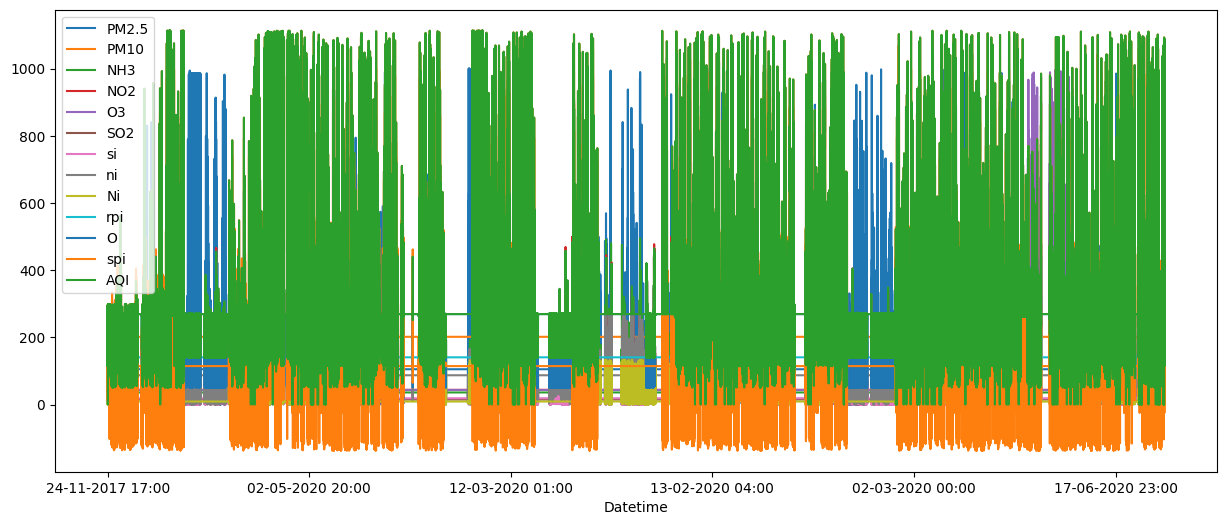

In [ ]:

df=data.set_index('Datetime')
df.sort_values(by='Datetime',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

<ipython-input-93-74c16f4afa8e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data[['AQI','year','StationId']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)


<Axes: xlabel='year', ylabel='AQI'>

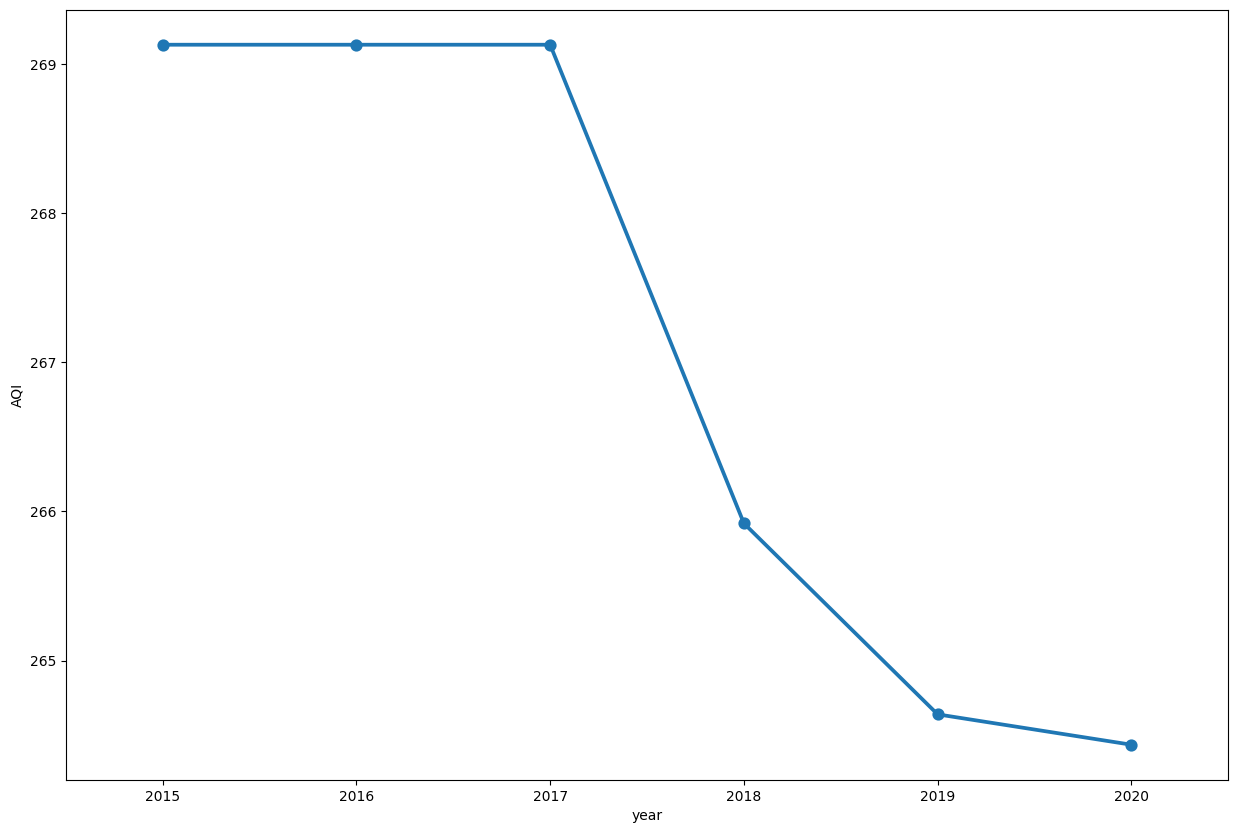

In [ ]:
data['Datetime'] = pd.to_datetime(data['Datetime']) # date parse
data['year'] = data['Datetime'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['AQI','year','StationId']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   StationId  1048575 non-null  object        
 1   Datetime   1048575 non-null  datetime64[ns]
 2   PM2.5      1048575 non-null  float64       
 3   PM10       1048575 non-null  float64       
 4   NH3        1048575 non-null  float64       
 5   NO2        1048575 non-null  float64       
 6   O3         1048575 non-null  float64       
 7   SO2        1048575 non-null  float64       
 8   si         1048575 non-null  float64       
 9   ni         1048575 non-null  float64       
 10  Ni         1048575 non-null  float64       
 11  rpi        1048575 non-null  float64       
 12  O          1048575 non-null  float64       
 13  spi        1048575 non-null  float64       
 14  AQI        1048575 non-null  float64       
 15  year       1048575 non-null  int64         
dtype

In [ ]:
def compute(var):
    train_norm = x_train[var]
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]

    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)

    mse = mean_squared_error(y_split_test, yhat)
    print(mse)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
x_train = Datetime[:24865]
y_train = x_train['PM2_5']
x_test = Datetime[24865:31898]
y_test = x_test['PM2_5']
print(y_test)


NameError: name 'Datetime' is not defined

In [ ]:
df.loc[24865:31898].count() / df.shape[0] * 100

year    0.0
AQI     0.0
dtype: float64

In [ ]:
train_norm = x_train['PM2.5']
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.19529984]
[0.21150729]
[0.25850891]
[0.26337115]
[0.24311183]


In [ ]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  8


In [ ]:
train_norm = train_norm[train_norm!=0]

In [ ]:
test_norm = x_test['PM2.5']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

NameError: name 'x_test' is not defined

In [ ]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  2


In [ ]:
test_norm = test_norm[test_norm != 0]

In [ ]:
print(train_norm.shape)
print(test_norm.shape)

(24857,)
(7031,)


In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [ ]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)

[[[0.19529984]
  [0.21150729]
  [0.25850891]]

 [[0.21150729]
  [0.25850891]
  [0.26337115]]

 [[0.25850891]
  [0.26337115]
  [0.24311183]]

 ...

 [[0.06726094]
  [0.07293355]
  [0.06077796]]

 [[0.07293355]
  [0.06077796]
  [0.06482982]]

 [[0.06077796]
  [0.06482982]
  [0.07536467]]]
[[[0.19529984]
  [0.21150729]
  [0.25850891]]

 [[0.21150729]
  [0.25850891]
  [0.26337115]]

 [[0.25850891]
  [0.26337115]
  [0.24311183]]

 ...

 [[0.06726094]
  [0.07293355]
  [0.06077796]]

 [[0.07293355]
  [0.06077796]
  [0.06482982]]

 [[0.06077796]
  [0.06482982]
  [0.07536467]]]
[[[0.19529984]
  [0.21150729]
  [0.25850891]]

 [[0.21150729]
  [0.25850891]
  [0.26337115]]

 [[0.25850891]
  [0.26337115]
  [0.24311183]]

 ...

 [[0.06726094]
  [0.07293355]
  [0.06077796]]

 [[0.07293355]
  [0.06077796]
  [0.06482982]]

 [[0.06077796]
  [0.06482982]
  [0.07536467]]]
[[[0.19529984]
  [0.21150729]
  [0.25850891]]

 [[0.21150729]
  [0.25850891]
  [0.26337115]]

 [[0.25850891]
  [0.26337115]
  [0.2431118

In [ ]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[0.08651685 0.06292135 0.12808989] 0.16179775280898878
[0.06292135 0.12808989 0.16179775] 0.16516853932584272
[0.12808989 0.16179775 0.16516854] 0.16853932584269665
[0.16179775 0.16516854 0.16853933] 0.12808988764044946
[0.16516854 0.16853933 0.12808989] 0.09213483146067417


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   StationId  1048575 non-null  object        
 1   Datetime   1048575 non-null  datetime64[ns]
 2   PM2.5      1048575 non-null  float64       
 3   PM10       1048575 non-null  float64       
 4   NH3        1048575 non-null  float64       
 5   NO2        1048575 non-null  float64       
 6   O3         1048575 non-null  float64       
 7   SO2        1048575 non-null  float64       
 8   si         1048575 non-null  float64       
 9   ni         1048575 non-null  float64       
 10  Ni         1048575 non-null  float64       
 11  rpi        1048575 non-null  float64       
 12  O          1048575 non-null  float64       
 13  spi        1048575 non-null  float64       
 14  AQI        1048575 non-null  float64       
 15  year       1048575 non-null  int64         
dtype

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
model = models.Sequential()


In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10
777/777 [==============================] - 8s 9ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 1.4229e-04
Epoch 2/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 1.4229e-04
Epoch 3/10
777/777 [==============================] - 8s 11ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 1.4229e-04
Epoch 4/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 1.4229e-04
Epoch 5/10
777/777 [==============================] - 8s 10ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 1.4229e-04
Epoch 6/10
777/777 [==============================] - 7s 9ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 1.4229e-04
Epoch 7/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0024 - accuracy: 0.000

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

220/220 [==============================] - 1s 2ms/step
[0.1245719]
[0.1584305]
[0.1707486]
[0.17520408]
[0.14076906]


In [ ]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)

MSE: 0.00227


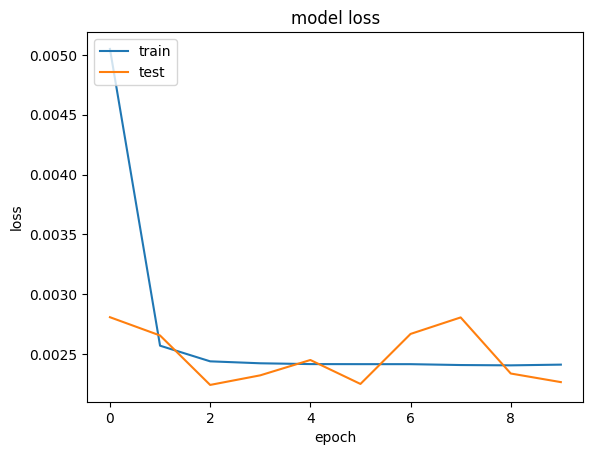

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
compute('PM10')

NameError: name 'compute' is not defined

In [ ]:
compute('PM2.5')

NameError: name 'compute' is not defined

Epoch 1/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0596 - accuracy: 4.0227e-05 - val_loss: 0.0516 - val_accuracy: 1.4227e-04
Epoch 2/10
777/777 [==============================] - 5s 7ms/step - loss: 0.0585 - accuracy: 4.0227e-05 - val_loss: 0.0517 - val_accuracy: 1.4227e-04
Epoch 3/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0582 - accuracy: 4.0227e-05 - val_loss: 0.0507 - val_accuracy: 1.4227e-04
Epoch 4/10
777/777 [==============================] - 5s 7ms/step - loss: 0.0579 - accuracy: 4.0227e-05 - val_loss: 0.0509 - val_accuracy: 1.4227e-04
Epoch 5/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0577 - accuracy: 4.0227e-05 - val_loss: 0.0509 - val_accuracy: 1.4227e-04
Epoch 6/10
777/777 [==============================] - 5s 6ms/step - loss: 0.0575 - accuracy: 4.0227e-05 - val_loss: 0.0501 - val_accuracy: 1.4227e-04
Epoch 7/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0574 - accuracy: 4.0227e

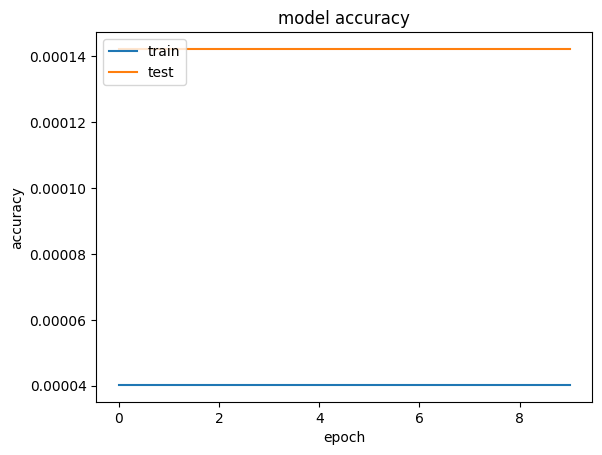

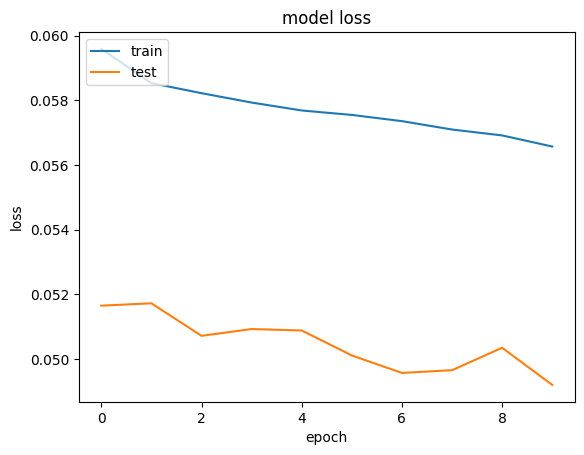

In [ ]:
compute('O')

Epoch 1/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 3.6432e-04 - val_accuracy: 0.0000e+00
Epoch 2/10
777/777 [==============================] - 5s 6ms/step - loss: 7.1751e-04 - accuracy: 0.0000e+00 - val_loss: 3.4660e-04 - val_accuracy: 0.0000e+00
Epoch 3/10
777/777 [==============================] - 6s 7ms/step - loss: 7.0828e-04 - accuracy: 0.0000e+00 - val_loss: 3.4000e-04 - val_accuracy: 0.0000e+00
Epoch 4/10
777/777 [==============================] - 6s 7ms/step - loss: 7.0221e-04 - accuracy: 0.0000e+00 - val_loss: 3.4104e-04 - val_accuracy: 0.0000e+00
Epoch 5/10
777/777 [==============================] - 5s 6ms/step - loss: 7.0229e-04 - accuracy: 0.0000e+00 - val_loss: 3.3741e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
777/777 [==============================] - 6s 8ms/step - loss: 7.0107e-04 - accuracy: 0.0000e+00 - val_loss: 3.7313e-04 - val_accuracy: 0.0000e+00
Epoch 7/10
777/777 [==============================] - 5s

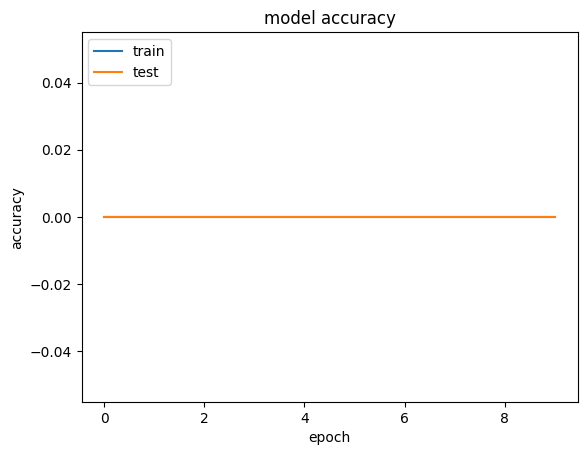

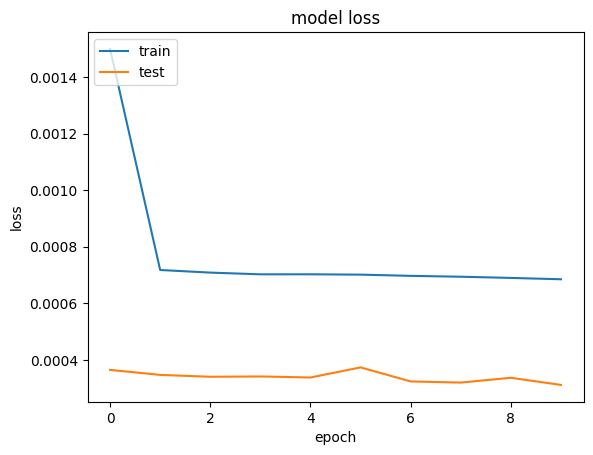

In [ ]:
compute('NH3')

Epoch 1/10
777/777 [==============================] - 5s 7ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 2/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 3/10
777/777 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 4/10
777/777 [==============================] - 7s 8ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 5/10
777/777 [==============================] - 5s 7ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 6/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 7/10
777/777 [==============================] - 6s 7ms/step - loss: 0.0021 - accuracy: 0.0000e

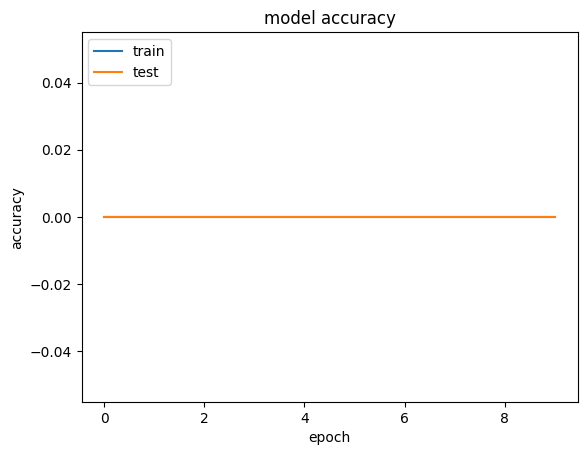

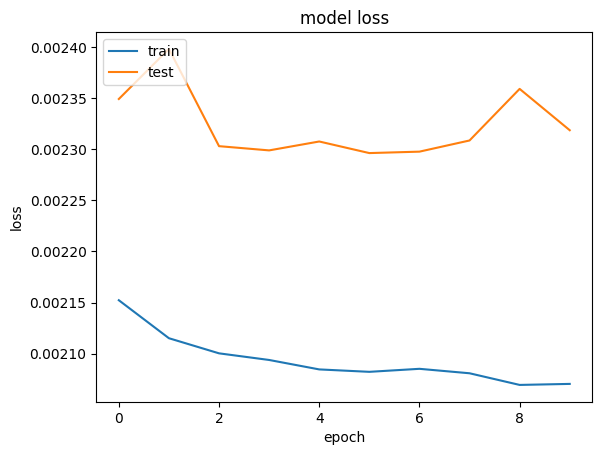

In [ ]:
compute('SO2')

Epoch 1/10
777/777 [==============================] - 5s 6ms/step - loss: 0.0025 - accuracy: 4.0225e-05 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 2/10
777/777 [==============================] - 5s 7ms/step - loss: 0.0025 - accuracy: 4.0225e-05 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 3/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0024 - accuracy: 4.0225e-05 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 4/10
777/777 [==============================] - 5s 6ms/step - loss: 0.0024 - accuracy: 4.0225e-05 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 5/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0024 - accuracy: 4.0225e-05 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 6/10
777/777 [==============================] - 6s 7ms/step - loss: 0.0024 - accuracy: 4.0225e-05 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 7/10
777/777 [==============================] - 6s 8ms/step - loss: 0.0024 - accuracy: 4.0225e

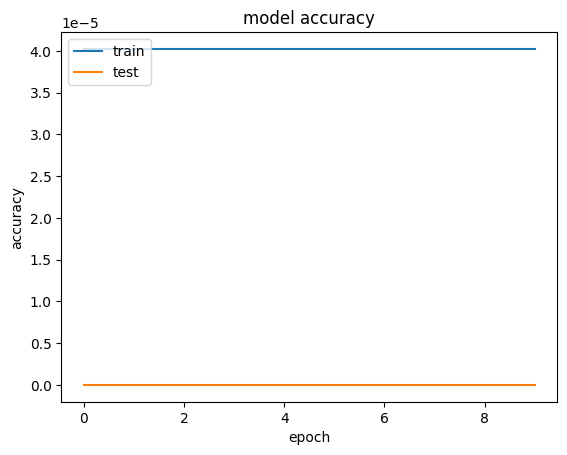

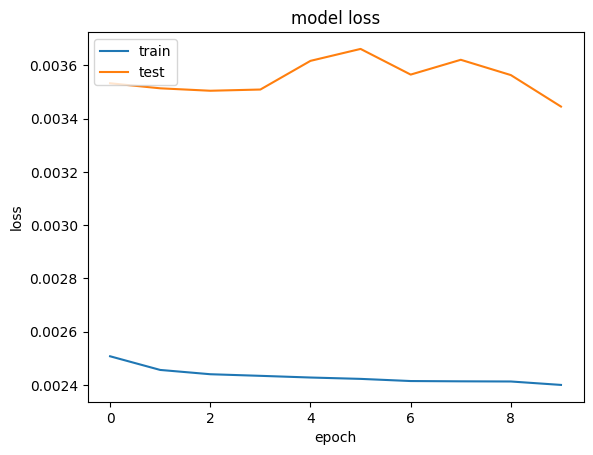

In [ ]:
compute('NO2')

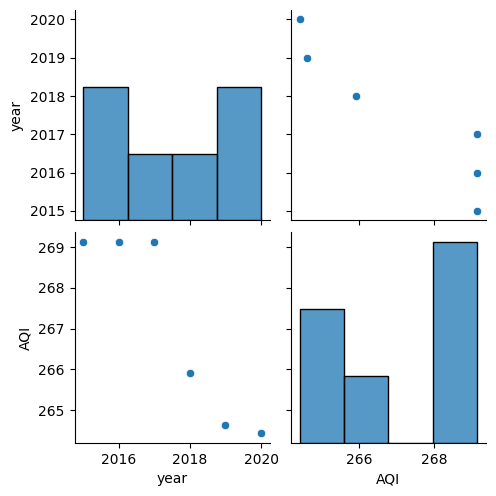

In [ ]:
g = sns.pairplot(df)

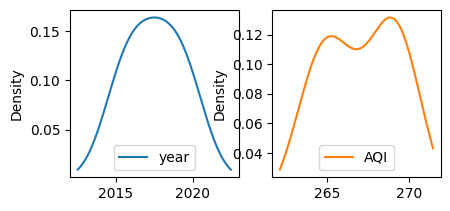

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10,10))
plt.show()

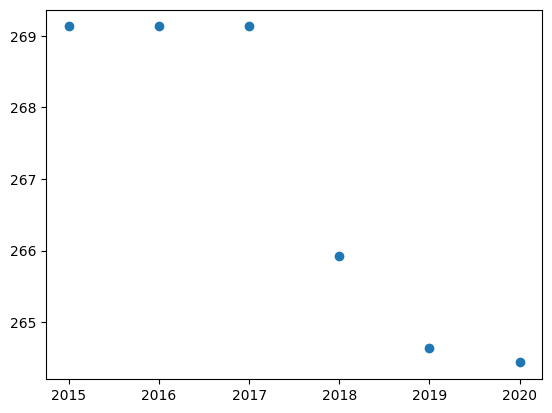

In [ ]:
cols =['year']
y = df['AQI']
x=df[cols]

plt.scatter(x,y)
plt.show()

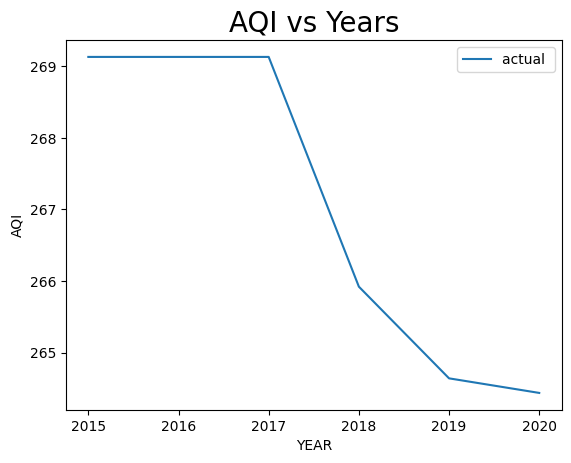

In [ ]:
x_axis=df.year
y_axis=df.AQI
plt.plot(x_axis,y_axis)

plt.title("AQI vs Years",fontsize=20)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=10)
plt.ylabel("AQI",fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

<Axes: >

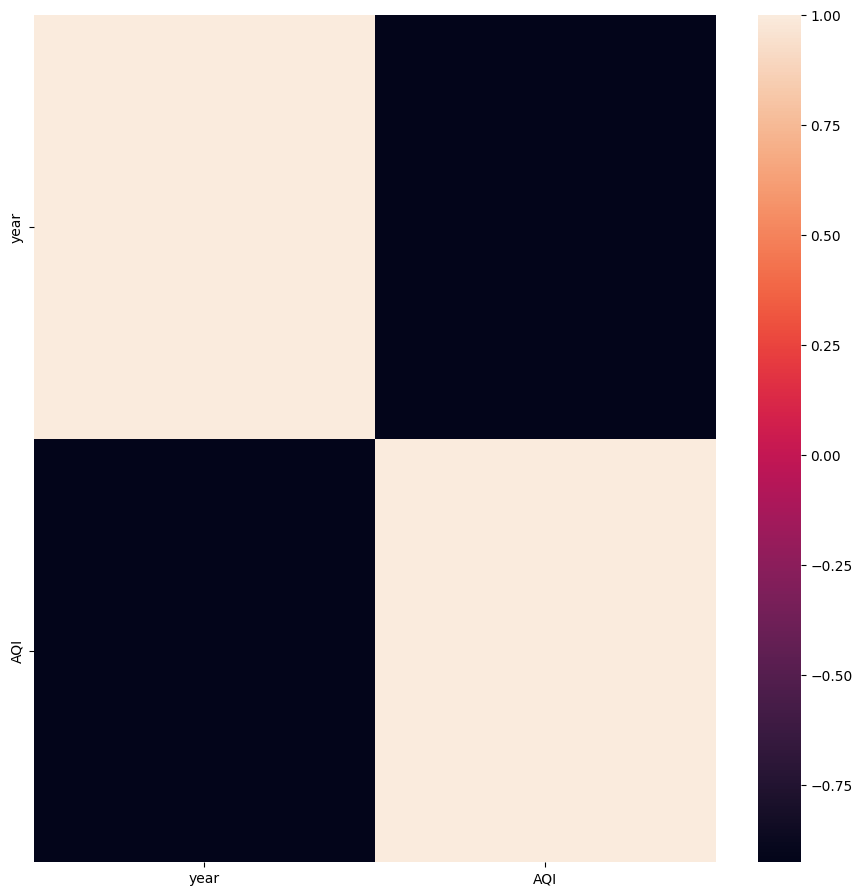

In [ ]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(corrmat)
